In [1]:
%matplotlib inline

import numpy as np
import networkx as nx
import pandas as pd
import math
import matplotlib.pyplot as plt
import sys
from random import random
import model

In [2]:
g, w = model.generate_graph()

In [3]:
g

In [4]:
w

[(('msg_cat_per', 'ss_cat_per'), 1.0),
 (('msg_cat_ent', 'ss_cat_ent'), 1.0),
 (('msg_cat_new', 'ss_cat_new'), 1.0),
 (('msg_cat_edu', 'ss_cat_edu'), 1.0),
 (('msg_cat_con', 'ss_cat_con'), 1.0),
 (('msg_rel', 'ss_rel'), 1.0),
 (('msg_qua', 'ss_qua'), 1.0),
 (('msg_sen', 'ss_sen'), 1.0),
 (('msg_sal', 'ss_sal'), 1.0),
 (('msg_med', 'ss_med'), 1.0),
 (('msg_com', 'ss_com'), 1.0),
 (('msg_que', 'ss_que'), 1.0),
 (('ss_cat_per', 'srs_cat_per'), 1.0),
 (('ss_cat_ent', 'srs_cat_ent'), 1.0),
 (('ss_cat_new', 'srs_cat_new'), 1.0),
 (('ss_cat_edu', 'srs_cat_edu'), 1.0),
 (('ss_cat_con', 'srs_cat_con'), 1.0),
 (('ss_rel', 'srs_rel'), 1.0),
 (('ss_qua', 'srs_qua'), 1.0),
 (('ss_sen', 'srs_sen'), 1.0),
 (('ss_sal', 'srs_sal'), 1.0),
 (('ss_med', 'srs_med'), 1.0),
 (('ss_com', 'srs_com'), 1.0),
 (('ss_que', 'srs_que'), 1.0),
 (('srs_cat_per', 'ff_ko'), 1.0),
 (('srs_cat_ent', 'ff_ent'), 1.0),
 (('srs_cat_new', 'ff_is'), 1.0),
 (('srs_cat_edu', 'ff_is'), 1.0),
 (('srs_cat_con', 'ff_si'), 1.0),
 (('s

In [6]:
msg_sequence = np.genfromtxt('data/messages.csv', delimiter=',', skip_header=1)
print(len(msg_sequence))
inputsDF, parameters = model.run_message_sequence(message_seq=msg_sequence, traits=np.random.rand(7))

200


In [7]:
inputsDF

,arousal,attention_1,attention_2,comment,dissatisfaction,ff_ent,ff_is,ff_ko,ff_se,ff_si,...,ss_com,ss_med,ss_qua,ss_que,ss_rel,ss_sal,ss_sen,ssr_pe_c,ssr_pe_l,ssr_pe_s
0,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000
1,0.000000e+00,1.478849e-02,0.000000,0.000000e+00,0.790493,0.030860,0.000838,0.004794,0.017300,0.109932,...,0.255621,0.277330,4.000000e-01,0.297460,0.091252,0.000000e+00,0.196335,0.579016,0.579016,0.579016
2,0.000000e+00,2.957698e-03,0.000000,3.478950e-03,0.945387,0.037033,0.001006,0.005753,0.020760,0.131918,...,0.306745,0.332796,4.800000e-01,0.356952,0.109502,0.000000e+00,0.235602,0.694820,0.694820,0.694820
3,0.000000e+00,5.915395e-04,0.000000,1.391580e-03,0.975607,0.038267,0.012996,0.005944,0.022975,0.136315,...,0.316970,0.343889,4.960000e-01,0.368851,0.113152,0.000000e+00,0.243455,0.717980,0.717980,0.717980
4,0.000000e+00,1.183079e-04,0.000000,4.174740e-04,0.981168,0.038514,0.037529,0.005983,0.022491,0.137195,...,0.319015,0.346107,4.992000e-01,0.371230,0.113882,0.000000e+00,0.245026,0.722612,0.722612,0.722612
5,0.000000e+00,8.319105e-05,0.000000,1.113264e-04,0.981552,0.038563,0.054319,0.005990,0.021975,0.137370,...,0.319424,0.346551,4.998400e-01,0.371706,0.114028,0.000000e+00,0.245340,0.723539,0.723539,0.723539
6,0.000000e+00,2.256514e-05,0.000000,2.783160e-05,0.981126,0.038573,0.061435,0.005992,0.021742,0.137406,...,0.319506,0.346640,4.999680e-01,0.371801,0.114058,0.000000e+00,0.245403,0.723724,0.723724,0.723724
7,0.000000e+00,4.513028e-06,0.000000,6.679584e-06,0.980825,0.038575,0.063840,0.005992,0.021660,0.137413,...,0.319522,0.346658,4.999936e-01,0.371820,0.114063,0.000000e+00,0.245415,0.723761,0.723761,0.723761
8,0.000000e+00,9.026057e-07,0.000000,1.558569e-06,0.980691,0.038575,0.064560,0.005992,0.021634,0.137414,...,0.319525,0.346661,4.999987e-01,0.371824,0.114065,0.000000e+00,0.245418,0.723769,0.723769,0.723769
9,0.000000e+00,1.805211e-07,0.000000,3.562445e-07,0.980642,0.038576,0.064759,0.005992,0.021627,0.137414,...,0.319526,0.346662,4.999997e-01,0.371825,0.114065,0.000000e+00,0.245418,0.723770,0.723770,0.723770


In [8]:
inputsDF.columns

Index(['arousal', 'attention_1', 'attention_2', 'comment', 'dissatisfaction',
       'ff_ent', 'ff_is', 'ff_ko', 'ff_se', 'ff_si', 'like', 'mood',
       'msg_cat_con', 'msg_cat_edu', 'msg_cat_ent', 'msg_cat_new',
       'msg_cat_per', 'msg_com', 'msg_med', 'msg_qua', 'msg_que', 'msg_rel',
       'msg_sal', 'msg_sen', 'nf_ent', 'nf_is', 'nf_ko', 'nf_se', 'nf_si',
       'prep_comm', 'prep_like', 'prep_share', 'pt_cons', 'satisfaction',
       'share', 'srs_cat_con', 'srs_cat_edu', 'srs_cat_ent', 'srs_cat_new',
       'srs_cat_per', 'srs_com', 'srs_med', 'srs_qua', 'srs_que', 'srs_rel',
       'srs_sal', 'srs_sen', 'ss_cat_con', 'ss_cat_edu', 'ss_cat_ent',
       'ss_cat_new', 'ss_cat_per', 'ss_com', 'ss_med', 'ss_qua', 'ss_que',
       'ss_rel', 'ss_sal', 'ss_sen', 'ssr_pe_c', 'ssr_pe_l', 'ssr_pe_s'],
      dtype='object')

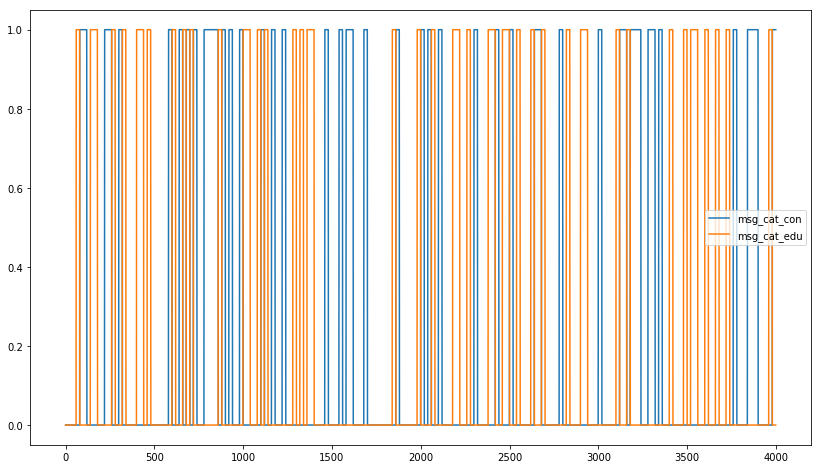

In [9]:
inputsDF[['msg_cat_con', 'msg_cat_edu']].plot(figsize=((14,8)))

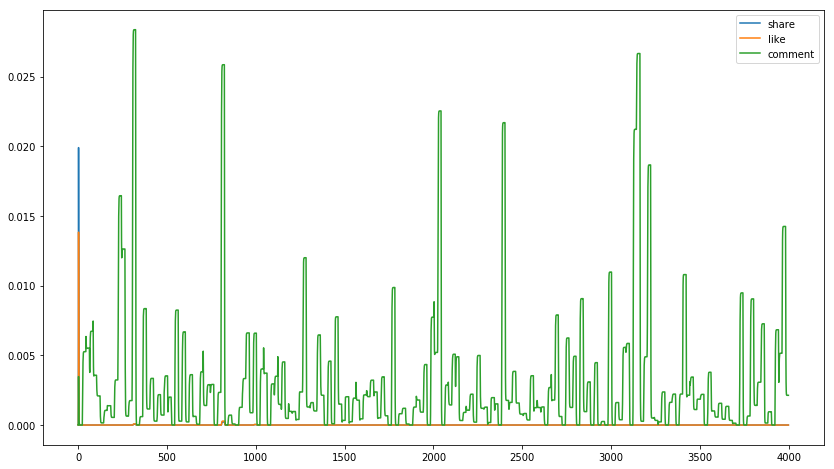

In [10]:
inputsDF[['share', 'like', 'comment']].plot(figsize=((14,8)))